In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

import seaborn as sns



#Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier


from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

In [692]:
from collections import Counter , defaultdict

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.base import TransformerMixin, BaseEstimator

from imblearn.over_sampling import SMOTE

from imblearn.combine import SMOTETomek # over sampling method 1



## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler # over sampling method 2



from imblearn.under_sampling import NearMiss


#preprocessing
from sklearn.preprocessing import LabelEncoder



import lightgbm as lgb

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [3]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [9]:
df = pd.read_csv("train_jqd04QH.csv")

df_test = pd.read_csv("test_KaymcHn.csv")
submission = pd.read_csv("sample_submission_sxfcbdx.csv")

df10 = df.copy()
df.shape, df_test.shape

((18359, 14), (15021, 13))

In [10]:
submission.head()

,enrollee_id,target
0,16548,0
1,12036,0
2,11061,0
3,5032,0
4,17599,0


In [59]:
Counter(submission.target)

Counter({0: 15021})

In [11]:
submission.shape

(15021, 2)

In [13]:
submission.isna().sum().sum()

0

In [7]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [8]:
df_test.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15021 non-null  int64  
 1   city                    15021 non-null  object 
 2   city_development_index  15021 non-null  float64
 3   gender                  11633 non-null  object 
 4   relevent_experience     15021 non-null  object 
 5   enrolled_university     14742 non-null  object 
 6   education_level         14626 non-null  object 
 7   major_discipline        12628 non-null  object 
 8   experience              14977 non-null  object 
 9   company_size            10970 non-null  object 
 10  company_type            10691 non-null  object 
 11  last_new_job            14717 non-null  object 
 12  training_hours          15021 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ MB


In [9]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [31]:
df_test.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

# <font color = 'blue'> Dataset Reading or Data Understanding

In [33]:
def get_percentage_miss_value(dataset):
    higher_miss_value_column = []
    miss_threshold_value = 50
    
    for i in dataset.columns:
        if dataset[i].isna().sum() > 1: 
            perectange_val = (dataset[i].isna().sum() / len(dataset)) * 100
            print("Column-> " , i, ", total no of missing value : ",dataset[i].isna().sum() , " & :         ", round(perectange_val,2) ," %")
                
            if(perectange_val > miss_threshold_value):
                higher_miss_value_column.append(i)
            
    print("\n\n\n")
        
    if higher_miss_value_column:
        print("Higher Missing values in Columns for Delete : \n\n", higher_miss_value_column) 
        
        return higher_miss_value_column
    else:
        print("There are no Higher Column Missing values in Dataset")

In [34]:
missing_val = get_percentage_miss_value(df)


Column->  gender , total no of missing value :  4098  & :          22.32  %
Column->  enrolled_university , total no of missing value :  342  & :          1.86  %
Column->  education_level , total no of missing value :  457  & :          2.49  %
Column->  major_discipline , total no of missing value :  2838  & :          15.46  %
Column->  experience , total no of missing value :  59  & :          0.32  %
Column->  company_size , total no of missing value :  4779  & :          26.03  %
Column->  company_type , total no of missing value :  5039  & :          27.45  %
Column->  last_new_job , total no of missing value :  367  & :          2.0  %




There are no Higher Column Missing values in Dataset


In [35]:
get_percentage_miss_value(df_test)

Column->  gender , total no of missing value :  3388  & :          22.56  %
Column->  enrolled_university , total no of missing value :  279  & :          1.86  %
Column->  education_level , total no of missing value :  395  & :          2.63  %
Column->  major_discipline , total no of missing value :  2393  & :          15.93  %
Column->  experience , total no of missing value :  44  & :          0.29  %
Column->  company_size , total no of missing value :  4051  & :          26.97  %
Column->  company_type , total no of missing value :  4330  & :          28.83  %
Column->  last_new_job , total no of missing value :  304  & :          2.02  %




There are no Higher Column Missing values in Dataset


In [36]:
df.isna().sum().sum() , df_test.isna().sum().sum()

(17979, 15184)

In [37]:
def visualize_categorical_values(dataset):
    no_of_columns = 3
    no_of_rows = 3
    
    columns_object_type = [i for i in dataset.columns  if dataset[i].dtype == "object"]
    total_rows = (len(columns_object_type) // no_of_rows ) + 1
    
    f, axes = plt.subplots(total_rows, no_of_columns, figsize=(18,34))

    for ind, val in enumerate(columns_object_type):
        sns.countplot(df[val] , ax = axes[ind // no_of_rows , ind %no_of_columns ])
    plt.show()   

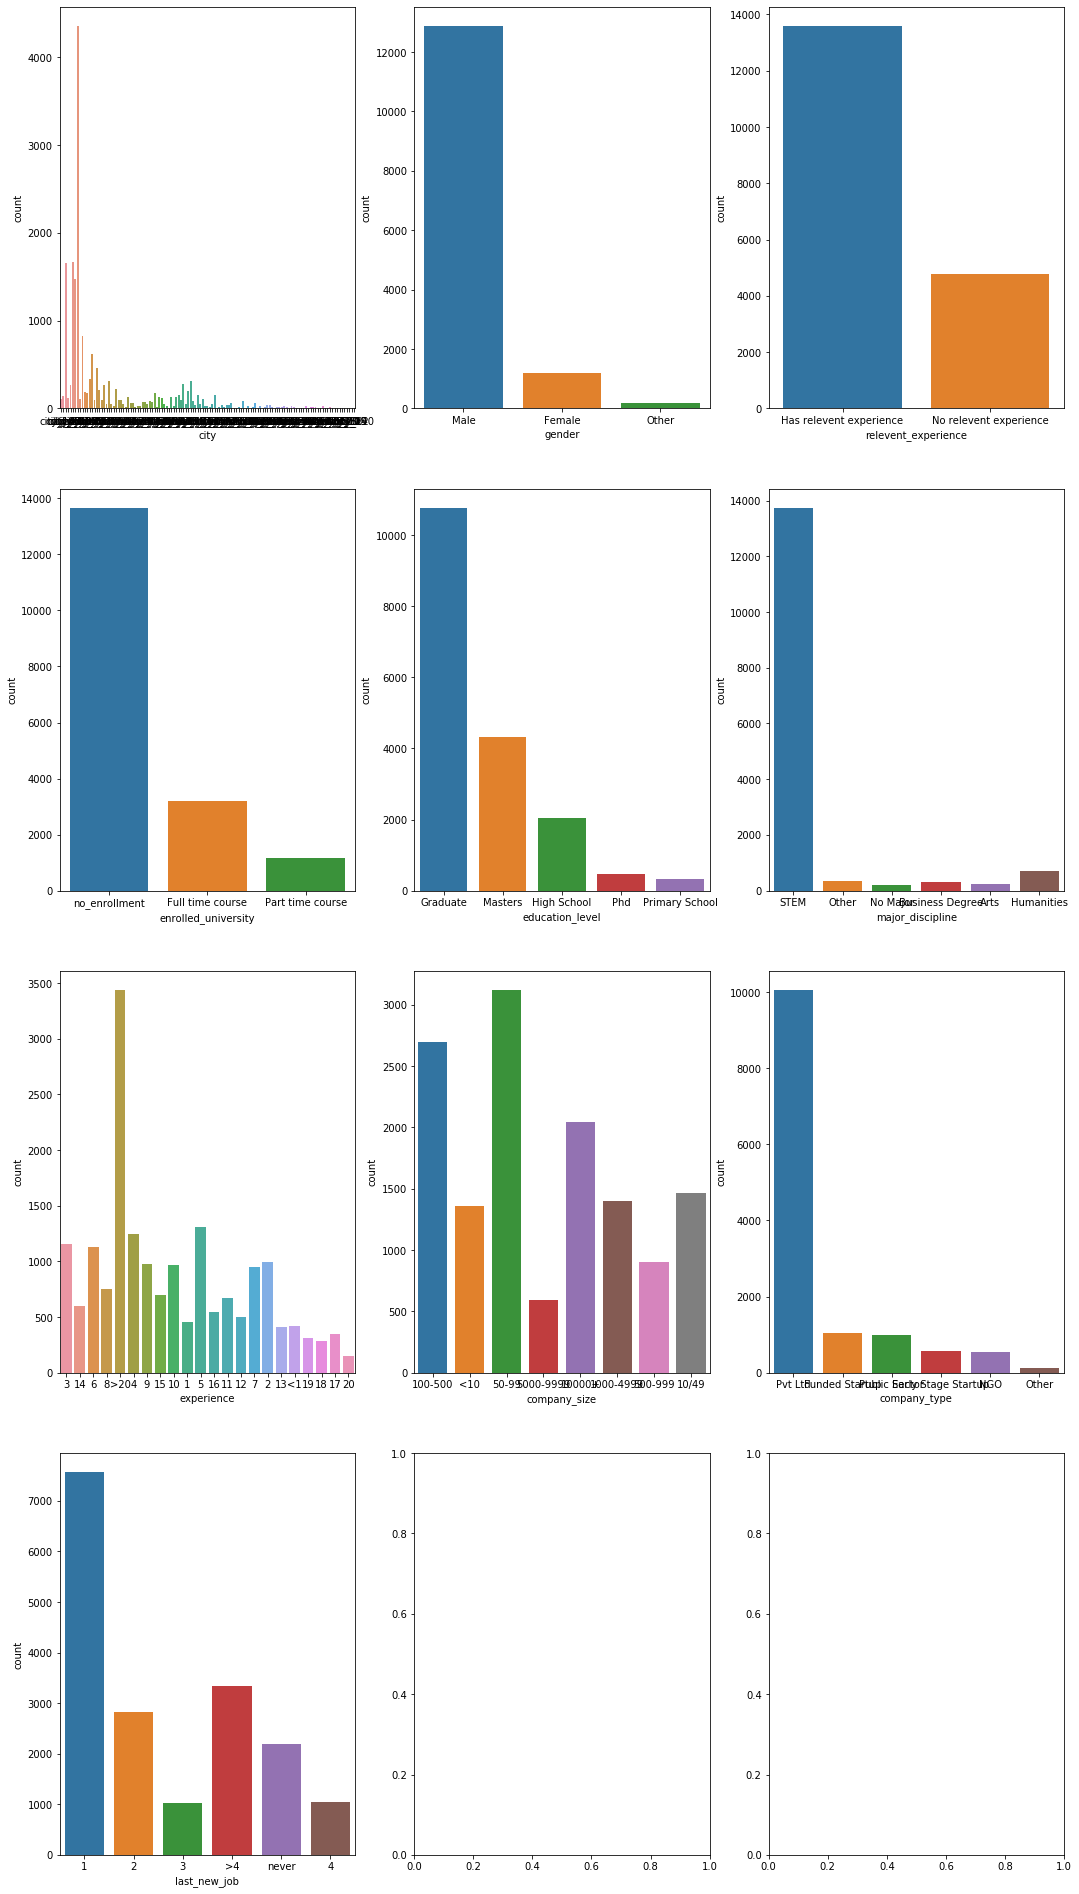

In [38]:
visualize_categorical_values(df)

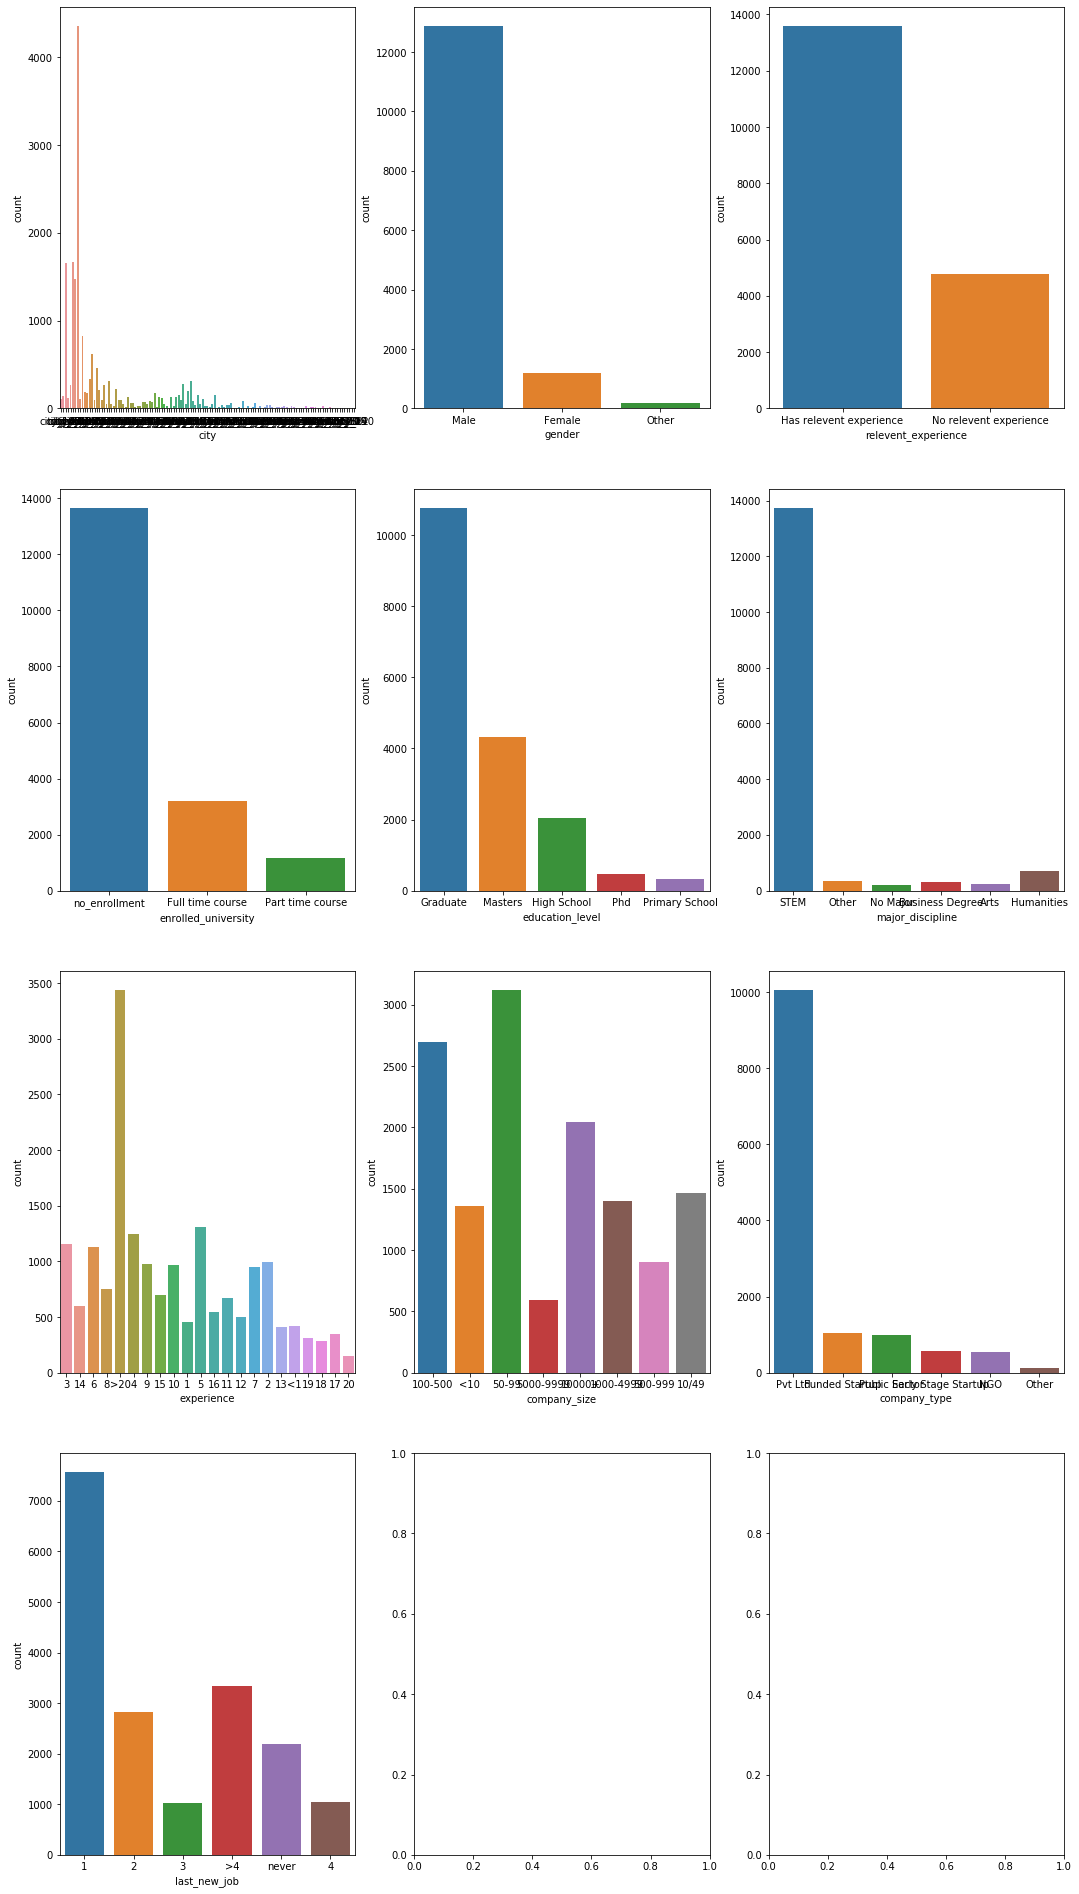

In [39]:
visualize_categorical_values(df_test)

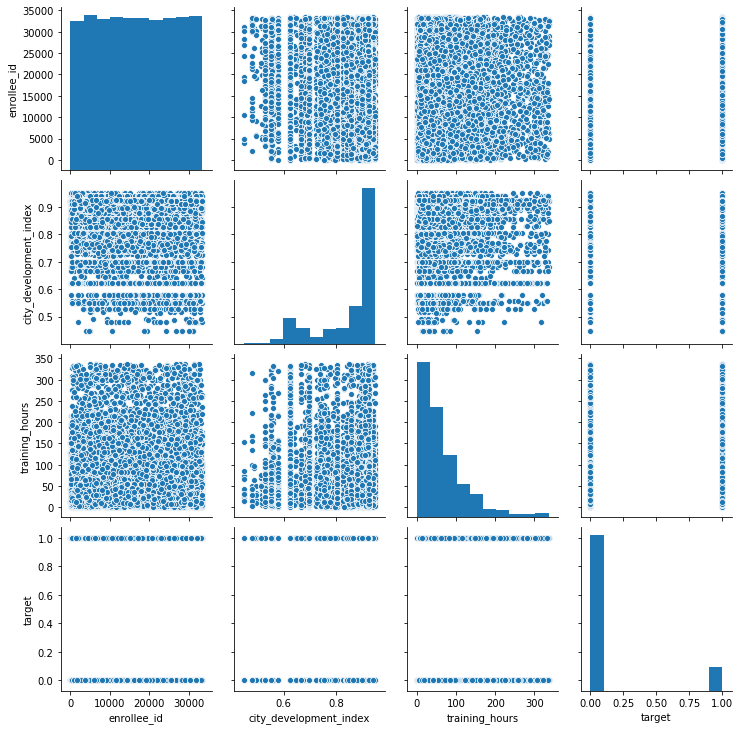

In [24]:
sns.pairplot(df)
plt.show()

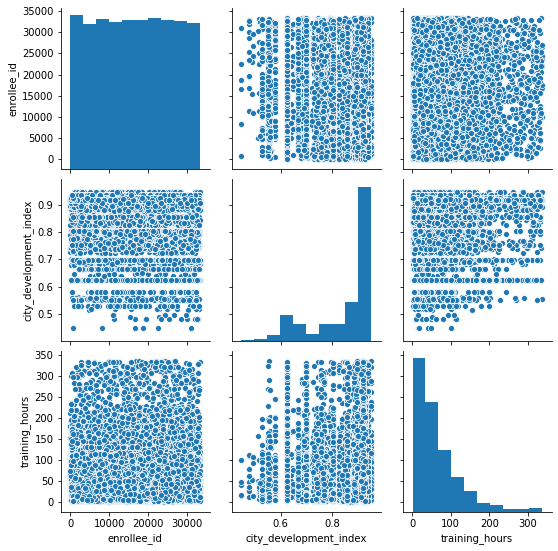

In [40]:
sns.pairplot(df_test)
plt.show()

In [60]:
15934 /len(df)

0.867912195653358

In [53]:
Counter(df.target)

Counter({0: 15934, 1: 2425})

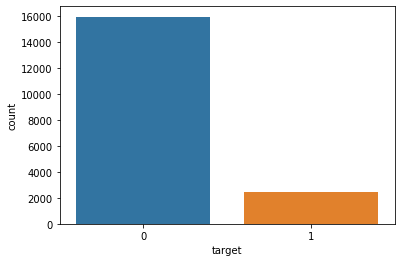

In [52]:
sns.countplot(df.target)

In [28]:
df.training_hours.value_counts()

28     307
12     291
18     285
20     269
22     263
      ... 
244      6
234      6
272      5
238      4
286      4
Name: training_hours, Length: 241, dtype: int64

In [41]:
def check_cloumn_details_type_categorical(dataset):
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            
            print("*"*100)
            print("\n")

In [43]:
check_cloumn_details_type_categorical(df)

Columns name :   city
{'city_149': 105, 'city_83': 142, 'city_16': 1654, 'city_64': 119, 'city_100': 271, 'city_21': 1672, 'city_114': 1472, 'city_103': 4358, 'city_97': 109, 'city_160': 827, 'city_65': 188, 'city_90': 180, 'city_75': 332, 'city_136': 624, 'city_159': 99, 'city_67': 455, 'city_28': 212, 'city_10': 95, 'city_73': 264, 'city_76': 49, 'city_104': 318, 'city_27': 54, 'city_30': 23, 'city_61': 217, 'city_99': 101, 'city_41': 95, 'city_142': 45, 'city_9': 21, 'city_116': 131, 'city_128': 62, 'city_74': 66, 'city_69': 20, 'city_1': 27, 'city_176': 24, 'city_40': 73, 'city_123': 78, 'city_152': 53, 'city_165': 90, 'city_89': 69, 'city_36': 175, 'city_44': 18, 'city_46': 128, 'city_45': 119, 'city_134': 48, 'city_93': 25, 'city_180': 5, 'city_162': 125, 'city_84': 23, 'city_138': 126, 'city_173': 156, 'city_19': 98, 'city_71': 281, 'city_158': 52, 'city_23': 194, 'city_102': 313, 'city_105': 87, 'city_91': 42, 'city_11': 150, 'city_13': 53, 'city_57': 108, 'city_20': 30, 'city_

In [44]:
check_cloumn_details_type_categorical(df_test)

Columns name :   city
{'city_33': 6, 'city_28': 175, 'city_103': 3494, 'city_104': 237, 'city_77': 23, 'city_160': 704, 'city_21': 1350, 'city_114': 1234, 'city_16': 1274, 'city_67': 366, 'city_50': 124, 'city_71': 262, 'city_136': 464, 'city_59': 9, 'city_102': 260, 'city_57': 86, 'city_100': 236, 'city_173': 132, 'city_65': 161, 'city_36': 140, 'city_97': 98, 'city_1': 37, 'city_24': 50, 'city_61': 187, 'city_117': 6, 'city_101': 41, 'city_13': 52, 'city_10': 97, 'city_75': 266, 'city_180': 5, 'city_140': 6, 'city_131': 8, 'city_138': 90, 'city_45': 102, 'city_74': 51, 'city_142': 49, 'city_46': 103, 'city_73': 251, 'city_141': 9, 'city_157': 14, 'city_11': 128, 'city_116': 107, 'city_109': 7, 'city_89': 51, 'city_80': 14, 'city_39': 8, 'city_98': 88, 'city_41': 69, 'city_152': 40, 'city_99': 71, 'city_42': 9, 'city_143': 27, 'city_105': 85, 'city_83': 101, 'city_91': 38, 'city_149': 89, 'city_134': 31, 'city_93': 29, 'city_20': 26, 'city_165': 79, 'city_23': 175, 'city_146': 4, 'cit

In [45]:
def check_cloumn_details_type_numberical(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "int"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
            
            
def check_cloumn_details_type_float(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "float"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")

In [46]:
check_cloumn_details_type_numberical(df)

Columns name :   enrollee_id
{23798: 1, 29166: 1, 46: 1, 18527: 1, 21751: 1, 13342: 1, 11746: 1, 24127: 1, 7615: 1, 9676: 1, 32957: 1, 13091: 1, 681: 1, 33356: 1, 20247: 1, 19752: 1, 28429: 1, 16508: 1, 13977: 1, 2776: 1, 16443: 1, 16067: 1, 20897: 1, 25178: 1, 3472: 1, 30466: 1, 18230: 1, 5634: 1, 11753: 1, 20881: 1, 23129: 1, 10386: 1, 5861: 1, 7537: 1, 14983: 1, 4957: 1, 13970: 1, 5325: 1, 32506: 1, 7006: 1, 5104: 1, 4653: 1, 18048: 1, 8861: 1, 10504: 1, 18446: 1, 20785: 1, 32244: 1, 23890: 1, 1501: 1, 5298: 1, 14257: 1, 32472: 1, 31515: 1, 11053: 1, 26862: 1, 26834: 1, 12935: 1, 27162: 1, 27439: 1, 11777: 1, 20501: 1, 5735: 1, 20605: 1, 16154: 1, 26681: 1, 9723: 1, 23783: 1, 24692: 1, 18022: 1, 27259: 1, 1297: 1, 21843: 1, 29170: 1, 28674: 1, 2196: 1, 31802: 1, 18150: 1, 26051: 1, 26651: 1, 4903: 1, 11934: 1, 19102: 1, 12006: 1, 6017: 1, 26507: 1, 16462: 1, 13854: 1, 25275: 1, 27329: 1, 14164: 1, 31021: 1, 28038: 1, 31131: 1, 6279: 1, 27425: 1, 10779: 1, 7286: 1, 18410: 1, 3340: 1,

In [47]:
check_cloumn_details_type_numberical(df_test)

Columns name :   enrollee_id
{16548: 1, 12036: 1, 11061: 1, 5032: 1, 17599: 1, 19314: 1, 12365: 1, 22696: 1, 16083: 1, 33240: 1, 813: 1, 1362: 1, 3821: 1, 26316: 1, 29269: 1, 22524: 1, 30407: 1, 863: 1, 27743: 1, 29303: 1, 1019: 1, 8819: 1, 5397: 1, 14697: 1, 10407: 1, 19224: 1, 735: 1, 14106: 1, 858: 1, 9061: 1, 12775: 1, 7964: 1, 30781: 1, 29346: 1, 17991: 1, 15768: 1, 15378: 1, 27248: 1, 5931: 1, 11897: 1, 10606: 1, 28368: 1, 11081: 1, 19611: 1, 1283: 1, 18590: 1, 2076: 1, 19130: 1, 29874: 1, 16387: 1, 22536: 1, 30268: 1, 23258: 1, 14201: 1, 10551: 1, 28787: 1, 23340: 1, 26020: 1, 22989: 1, 14594: 1, 10127: 1, 18684: 1, 20163: 1, 997: 1, 32505: 1, 28948: 1, 19793: 1, 22487: 1, 28765: 1, 28078: 1, 3780: 1, 15396: 1, 31167: 1, 8834: 1, 12051: 1, 29453: 1, 4305: 1, 28298: 1, 33189: 1, 6611: 1, 4763: 1, 11459: 1, 4870: 1, 12630: 1, 29618: 1, 30033: 1, 25404: 1, 5522: 1, 13026: 1, 14788: 1, 8450: 1, 15425: 1, 17221: 1, 32535: 1, 3356: 1, 6938: 1, 25715: 1, 25064: 1, 29805: 1, 20608: 1, 3

In [48]:
check_cloumn_details_type_float(df)

Columns name :   city_development_index
{0.6890000000000001: 105, 0.9229999999999999: 142, 0.91: 1654, 0.6659999999999999: 119, 0.887: 271, 0.624: 1672, 0.9259999999999999: 1472, 0.92: 5185, 0.925: 178, 0.802: 188, 0.698: 655, 0.9390000000000001: 544, 0.897: 624, 0.843: 99, 0.855: 455, 0.895: 95, 0.754: 264, 0.924: 318, 0.848: 54, 0.9129999999999999: 217, 0.915: 101, 0.8270000000000001: 148, 0.727: 45, 0.743: 152, 0.527: 62, 0.579: 86, 0.856: 35, 0.847: 45, 0.764: 24, 0.7759999999999999: 89, 0.738: 78, 0.903: 90, 0.893: 175, 0.725: 18, 0.762: 128, 0.89: 119, 0.865: 25, 0.767: 125, 0.836: 126, 0.878: 156, 0.682: 98, 0.884: 281, 0.7659999999999999: 52, 0.899: 194, 0.804: 313, 0.794: 102, 0.691: 42, 0.55: 150, 0.866: 108, 0.7959999999999999: 30, 0.789: 50, 0.8959999999999999: 150, 0.9209999999999999: 10, 0.64: 14, 0.74: 67, 0.479: 19, 0.83: 38, 0.5579999999999999: 44, 0.512: 4, 0.518: 4, 0.735: 7, 0.9490000000000001: 86, 0.649: 4, 0.722: 29, 0.625: 3, 0.745: 13, 0.73: 7, 0.487000000000000

In [49]:
check_cloumn_details_type_float(df_test)

Columns name :   city_development_index
{0.44799999999999995: 6, 0.9390000000000001: 441, 0.92: 4198, 0.924: 237, 0.83: 23, 0.624: 1350, 0.9259999999999999: 1234, 0.91: 1274, 0.855: 366, 0.8959999999999999: 124, 0.884: 262, 0.897: 464, 0.775: 9, 0.804: 260, 0.866: 86, 0.887: 236, 0.878: 132, 0.802: 161, 0.893: 140, 0.925: 149, 0.847: 51, 0.698: 521, 0.9129999999999999: 187, 0.5579999999999999: 41, 0.8270000000000001: 121, 0.895: 97, 0.856: 20, 0.68: 8, 0.836: 90, 0.89: 102, 0.579: 63, 0.727: 49, 0.762: 103, 0.754: 251, 0.763: 9, 0.769: 14, 0.55: 128, 0.743: 121, 0.701: 7, 0.898: 8, 0.9490000000000001: 88, 0.915: 71, 0.563: 9, 0.74: 42, 0.794: 95, 0.9229999999999999: 101, 0.691: 38, 0.6890000000000001: 89, 0.865: 29, 0.7959999999999999: 26, 0.903: 79, 0.899: 175, 0.735: 4, 0.527: 44, 0.682: 84, 0.745: 9, 0.767: 98, 0.7759999999999999: 98, 0.78: 4, 0.645: 3, 0.738: 74, 0.693: 5, 0.7659999999999999: 46, 0.9209999999999999: 9, 0.722: 17, 0.6659999999999999: 115, 0.7809999999999999: 8, 0.76

In [50]:
Counter(df.target)

Counter({0: 15934, 1: 2425})

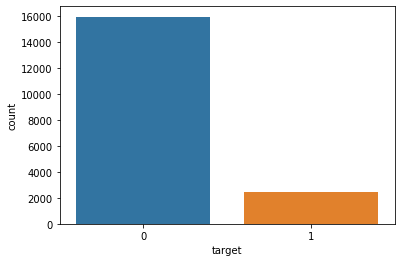

In [56]:
def check_skewness_numerical(dataset):
    #analysing the distribution of HR Selection
    print('skew is', dataset.target.skew())   
    plt.hist(dataset['target'], color= 'b')

    plt.title('Distribution of HR section YES / NO', fontsize = 24)
    plt.ylabel('observation', fontsize = 20)
    plt.xlabel('selection', fontsize = 20)

    plt.show()

skew is 2.1734037375037607


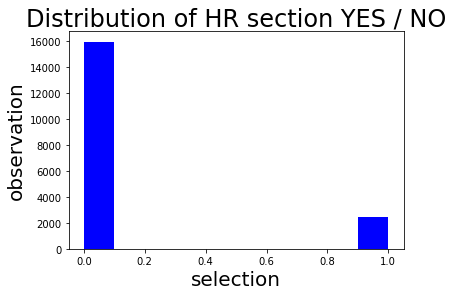

In [57]:
check_skewness_numerical(df)

In [54]:
Counter(df.target)

Counter({0: 15934, 1: 2425})

In [58]:
15934 / len(df)

0.867912195653358

In [59]:
2425 / len(df)

0.13208780434664197

In [60]:
13659 / len(df)

0.7439947709570238

In [14]:
df10.shape

(18359, 14)

In [15]:

df11 = df10.dropna(axis=0)
df11.shape

(9287, 14)

In [16]:
df11.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
5,13342,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,Other,8,5000-9999,Pvt Ltd,2,34,0
6,11746,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,10000+,Pvt Ltd,3,23,1


In [17]:
feature_column = ["city_development_index","training_hours"]

In [18]:
Counter(df11.target)

Counter({0: 8296, 1: 991})

In [19]:
# check_cloumn_details_type_categorical(df11)

In [112]:
def drop_outliers(x, columns_name):
    list = []
    for chk in columns_name:
        Q1 = x[chk].quantile(.25)
        Q3 = x[chk].quantile(.75)
        IQR = Q3-Q1
        x =  x[(x[chk] >= (Q1-(1.5*IQR))) & (x[chk] <= (Q3+(1.5*IQR)))] 
    return x  

In [ ]:
# dataframe_columns_name = numberical_float_columns + numberical_int_columns
# print(dataframe_columns_name)

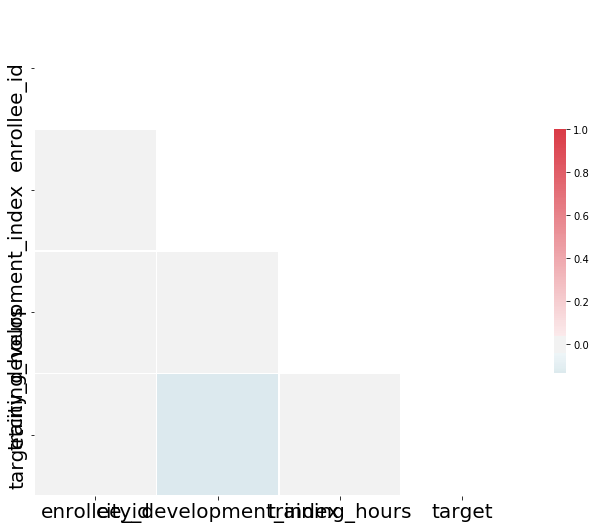

In [26]:
#To find correlation among varibales
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap='RdYlGn')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
ax.tick_params(labelsize=20)

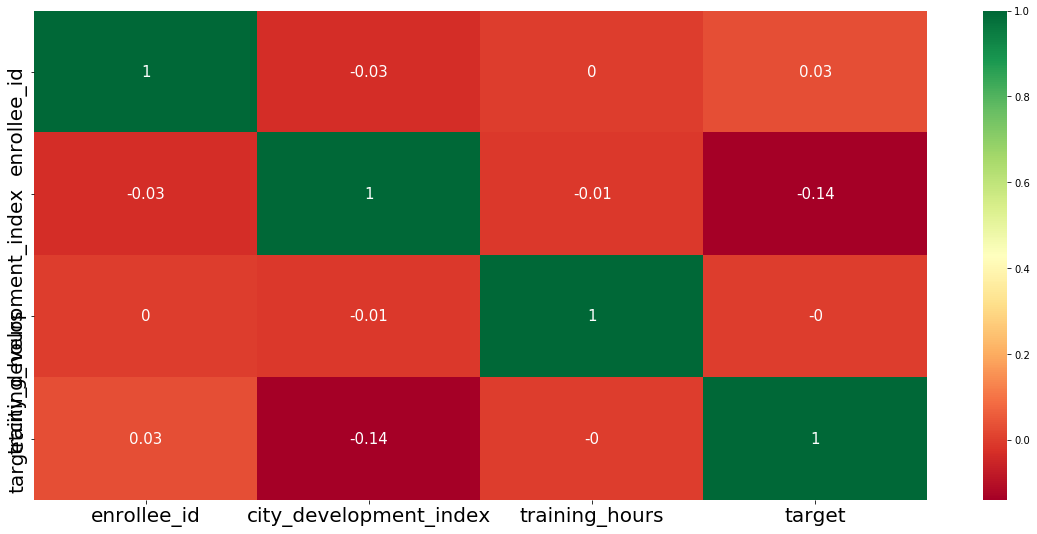

In [27]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='RdYlGn', annot_kws={"size": 15})
ax.tick_params(labelsize=20)
plt.show()

# <font color = 'green'> EDA

# <font color = 'orange'> 1) Data Cleaning

In [405]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [407]:
df.shape

(18359, 14)

In [414]:
drop_not_imp_col = [  "enrollee_id","enrolled_university", "major_discipline" , "company_type", "training_hours"]

In [415]:
print(len(drop_not_imp_col))

5


In [549]:
# df1 = df.drop(columns = drop_not_imp_col , axis = 1)

df1 = df.copy()
df1.shape, df.shape

((18359, 14), (18359, 14))

In [550]:
# df1_test = df_test.drop(columns = drop_not_imp_col , axis = 1)

df1_test = df_test.copy()
df1_test.shape, df_test.shape

((15021, 13), (15021, 13))

In [551]:
# df2 = df1.dropna(subset=["gender" , "company_size"], axis=0)
# df2.shape

df2 = df1.copy()
df2.shape

(18359, 14)

In [552]:
# df2_test = df1_test.dropna(subset=["gender" , "company_size"], axis=0)
# df2_test.shape


df2_test = df1_test.copy()
df2_test.shape

(15021, 13)

In [553]:
df2.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [554]:
# get_percentage_miss_value(df)

In [555]:
get_percentage_miss_value(df2)

Column->  gender , total no of missing value :  4098  & :          22.32  %
Column->  enrolled_university , total no of missing value :  342  & :          1.86  %
Column->  education_level , total no of missing value :  457  & :          2.49  %
Column->  major_discipline , total no of missing value :  2838  & :          15.46  %
Column->  experience , total no of missing value :  59  & :          0.32  %
Column->  company_size , total no of missing value :  4779  & :          26.03  %
Column->  company_type , total no of missing value :  5039  & :          27.45  %
Column->  last_new_job , total no of missing value :  367  & :          2.0  %




There are no Higher Column Missing values in Dataset


In [556]:
df2.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [557]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [558]:
df3 = DataFrameImputer().fit_transform(df2)
df3.shape

(18359, 14)

In [559]:
df3_test = DataFrameImputer().fit_transform(df2_test)
df3_test.shape

(15021, 13)

In [560]:
df3.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

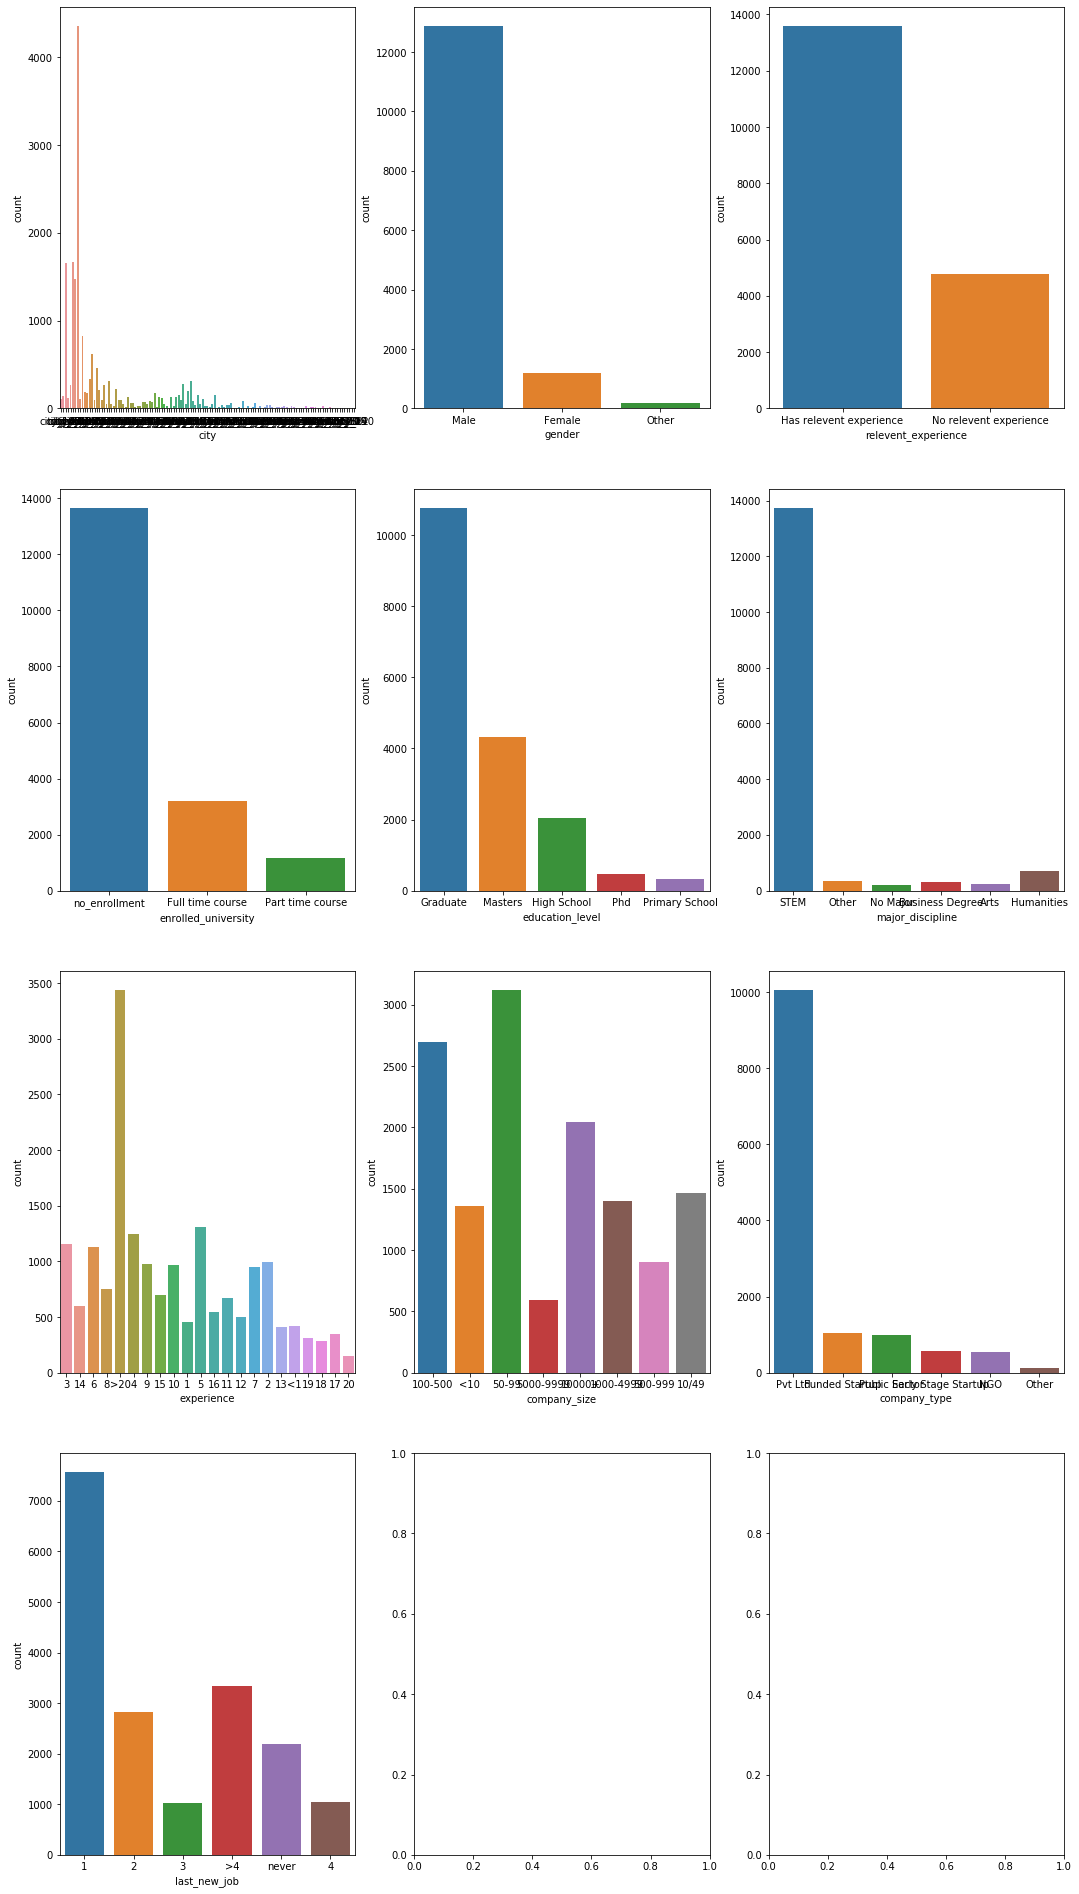

In [561]:
visualize_categorical_values(df3)

In [562]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  18359 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18359 non-null  object 
 6   education_level         18359 non-null  object 
 7   major_discipline        18359 non-null  object 
 8   experience              18359 non-null  object 
 9   company_size            18359 non-null  object 
 10  company_type            18359 non-null  object 
 11  last_new_job            18359 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [563]:
dataframe_columns_name = ["city_development_index"]

# df4 = drop_outliers(df3, dataframe_columns_name)

df4 = df3.copy()
df4.shape

(18359, 14)

In [564]:
# df4_test = drop_outliers(df3_test, dataframe_columns_name)

df4_test = df3_test.copy()
df4_test.shape

(15021, 13)

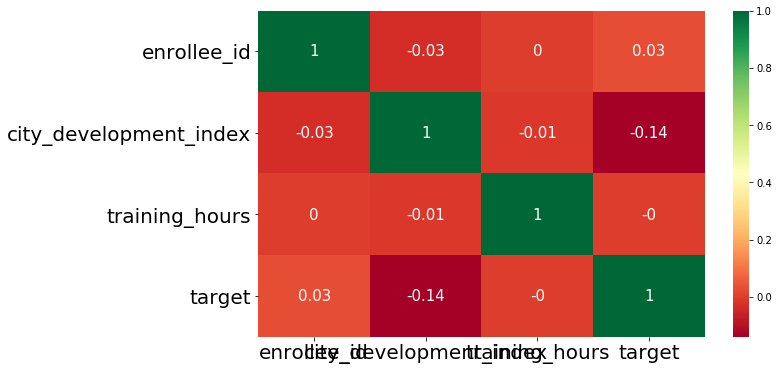

In [565]:
corr = df4.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='RdYlGn', annot_kws={"size": 15})
ax.tick_params(labelsize=20)
plt.show()

In [566]:
def convert_to_numerical_datatype_train(dataset):
    enc = LabelEncoder()
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            dataset[i] = enc.fit_transform(dataset[i])
            
    return dataset

In [567]:
df5 = convert_to_numerical_datatype_train(df4.copy())
df5.shape , df4.shape

((18359, 14), (18359, 14))

In [568]:
df4_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,Male,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,1,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,50-99,Pvt Ltd,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [569]:
df5_test = convert_to_numerical_datatype_train(df4_test.copy())
df5_test.shape , df4_test.shape

((15021, 13), (15021, 13))

In [570]:
df5.city_development_index.min(), df5.city_development_index.max() , df5.city_development_index.mean(), df5.city_development_index.median()

(0.44799999999999995, 0.9490000000000001, 0.8471395500844462, 0.91)

In [571]:
df5.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,41,0.689,1,0,2,0,5,13,1,5,0,106,0
1,29166,112,0.923,1,0,2,0,5,5,7,1,0,69,0
2,46,48,0.910,1,0,2,0,5,16,4,4,1,4,0
3,18527,93,0.666,1,0,2,0,5,5,4,5,0,26,0
4,21751,2,0.887,1,1,2,2,5,18,4,5,1,88,1


# <font color ='green' > Imbalanced Dataset(Over Sampling) : Majority Classes

In [572]:
df5.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,41,0.689,1,0,2,0,5,13,1,5,0,106,0
1,29166,112,0.923,1,0,2,0,5,5,7,1,0,69,0
2,46,48,0.910,1,0,2,0,5,16,4,4,1,4,0


In [573]:
df5.shape

(18359, 14)

In [576]:
columns = df5.columns.tolist()
columns = [c for c in columns if c not in ["target"]]

X2 = df5[columns]
Y2 = df5["target"]

os =  RandomOverSampler(random_state=35)
X_2 , y_2= os.fit_sample(X2, Y2)


In [577]:
Counter(df5.target), X_2.shape , y_2.shape, df5.shape

(Counter({0: 15934, 1: 2425}), (31868, 13), (31868,), (18359, 14))

In [580]:
Counter(y_2)

Counter({0: 15934, 1: 15934})

In [581]:
Counter(y_2)

Counter({0: 15934, 1: 15934})

# <font color ='red' > Feature Engineering

In [582]:
# X = df5.iloc[:,:-1]
# Y = df5.iloc[:,-1]


X = X_2
Y = y_2

In [583]:
X.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,23798,41,0.689,1,0,2,0,5,13,1,5,0,106
1,29166,112,0.923,1,0,2,0,5,5,7,1,0,69
2,46,48,0.910,1,0,2,0,5,16,4,4,1,4


In [584]:
# splitting the data into training sets and testing set
X_train, X_test, y_train, y_test = train_test_split(X ,Y , test_size = 0.40 , random_state = 10)

In [585]:
model1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

# model1 = XGBClassifier()

In [586]:
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [587]:
accuracy_score(y_test, y_pred) , precision_score(y_test, y_pred) , recall_score(y_test, y_pred) , roc_auc_score(y_test, y_pred)

(0.8835111390021965,
 0.8496208327371584,
 0.9318895166352793,
 0.8835263141520187)

In [588]:
confusion_matrix(y_test, y_pred)

array([[5325, 1051],
       [ 434, 5938]])

In [589]:
Counter(y_pred)

Counter({0: 5759, 1: 6989})

In [590]:
X_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [591]:
def get_accuracy(y_train_val , y_pred_val , dataset_type = "Default"):
    
    print(" Dataset type is : ", dataset_type)
    
    accuracy = accuracy_score(y_train_val, y_pred_val)
    accuracy = round(accuracy, 4) * 100
    print("\n Accuracy Score     : ",accuracy)
    
    precision_accuracy = precision_score(y_train_val, y_pred_val)
    precision_accuracy = round(precision_accuracy, 4) * 100
    print("\n precision_accuracy : ",precision_accuracy)
    
    recall_accuracy = recall_score(y_train_val, y_pred_val)
    recall_accuracy = round(recall_accuracy, 4) * 100
    print("\n recall_accuracy    : ",recall_accuracy)
    
    roc_auc_accuracy = roc_auc_score(y_train_val, y_pred_val)
    roc_auc_accuracy = round(roc_auc_accuracy, 4) * 100
    print("\n roc_auc_accuracy   : ",roc_auc_accuracy)
    

In [592]:
get_accuracy(y_test, y_pred , "Train")

 Dataset type is :  Train

 Accuracy Score     :  88.35

 precision_accuracy :  84.96000000000001

 recall_accuracy    :  93.19

 roc_auc_accuracy   :  88.35


In [593]:
get_accuracy(y_test, y_pred , "Train")

 Dataset type is :  Train

 Accuracy Score     :  88.35

 precision_accuracy :  84.96000000000001

 recall_accuracy    :  93.19

 roc_auc_accuracy   :  88.35


In [594]:
# get_accuracy(y_test, y_pred , "Train")

In [619]:
rows=[]
def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            model.fit(x_train,y_train)
            pred_test = model.predict(x_test)
            row = [names[j],i,r2_score (y_test,pred_test)]
            rows.append(row)
    models_df = pd.DataFrame(rows)   
    models_df.columns = columns_name
    print(models_df)
    

    
    

   

rows=[]

def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.30 , random_state = i)
            
            model.fit(x_train,y_train)
            
            y_pred_train = model.predict(x_train)
            y_pred = model.predict(x_test)
            
            train_acc = accuracy_score(y_train, y_pred_train)
            train_acc = round(train_acc, 4) * 100
            
            test_acc = accuracy_score(y_test, y_pred)
            test_acc = round(test_acc, 4) * 100
            
            roc_auc_score_acc = roc_auc_score(y_test, y_pred)
            roc_auc_score_acc = round(roc_auc_score_acc, 4) * 100
            

            row = [names[j],   i,   train_acc, test_acc, roc_auc_score_acc]
    
            rows.append(row)
            
    models_df = pd.DataFrame(rows) 
    
    models_df.columns = columns_name
    print(models_df)
    


In [620]:
names_regression = [ "LightGBM", "RF", "XGBoost" , "SVM"]
algorithms = [ LGBMClassifier(), RandomForestClassifier(), XGBClassifier(), SVC()]

columns_name = ["Model",    "Random_state",   'Train_acc',     "Test_acc" , "roc_auc_score"]

random_state_list_up_to_10 = [1,2,3]


addRandomStateForAlgorithm(X,Y,names_regression,algorithms,columns_name,random_state_list_up_to_10)

       Model  Random_state  Train_acc  Test_acc  roc_auc_score
0   LightGBM             1      79.91     74.44          74.47
1   LightGBM             2      80.62     75.88          75.89
2   LightGBM             3      79.69     74.54          74.54
3         RF             1     100.00     96.79          96.84
4         RF             2     100.00     97.22          97.23
5         RF             3     100.00     97.49          97.48
6    XGBoost             1      65.74     64.46          64.38
7    XGBoost             2      65.60     64.80          64.77
8    XGBoost             3      65.58     64.06          64.08
9        SVM             1      53.07     51.60          51.90
10       SVM             2      52.16     52.53          52.58
11       SVM             3      52.37     52.88          52.87


In [597]:
df.shape

(18359, 14)

In [598]:
model_final = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


In [693]:
X_train, X_test, y_train, y_test = train_test_split(X ,Y , test_size = 0.05 , random_state = 10)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)


Starting training...
[1]	valid_0's l1: 0.497749	valid_0's l2: 0.247806
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.495866	valid_0's l2: 0.246039
[3]	valid_0's l1: 0.493866	valid_0's l2: 0.244225
[4]	valid_0's l1: 0.491995	valid_0's l2: 0.242597
[5]	valid_0's l1: 0.489941	valid_0's l2: 0.240823
[6]	valid_0's l1: 0.488305	valid_0's l2: 0.239504
[7]	valid_0's l1: 0.486839	valid_0's l2: 0.238378
[8]	valid_0's l1: 0.485169	valid_0's l2: 0.237057
[9]	valid_0's l1: 0.483315	valid_0's l2: 0.235633
[10]	valid_0's l1: 0.48165	valid_0's l2: 0.234381
[11]	valid_0's l1: 0.480251	valid_0's l2: 0.233349
[12]	valid_0's l1: 0.478947	valid_0's l2: 0.232451
[13]	valid_0's l1: 0.477594	valid_0's l2: 0.231412
[14]	valid_0's l1: 0.476433	valid_0's l2: 0.23068
[15]	valid_0's l1: 0.474985	valid_0's l2: 0.229646
[16]	valid_0's l1: 0.473643	valid_0's l2: 0.228788
[17]	valid_0's l1: 0.472139	valid_0's l2: 0.227737
[18]	valid_0's l1: 0.470891	valid_0's l2: 0.226948
[19]	valid_0

In [694]:

y_pred_final = gbm.predict(df5_test, num_iteration=gbm.best_iteration)



In [ ]:
# y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [673]:
# Create a based model
# model_final = RandomForestClassifier()

In [675]:
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'max_depth': [4,8,10],
#     'min_samples_leaf': range(100, 400, 200),
#     'min_samples_split': range(200, 500, 200),
#     'n_estimators': [100,200, 300], 
#     'max_features': [5, 10],
#     "criterion": ["gini", "entropy"]
# }

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1,verbose = 1)



In [676]:
# Fit the grid search to the data
# grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  9.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [677]:
# printing the optimal accuracy score and hyperparameters
# print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.6341525726941363 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [ ]:
# model_final = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
#                                               class_weight=None,
#                                               criterion='gini', max_depth=None,
#                                               max_features='auto',
#                                               max_leaf_nodes=None,
#                                               max_samples=None,
#                                               min_impurity_decrease=0.0,
#                                               min_impurity_split=None,
#                                               min_samples_leaf=1,
#                                               min_samples_split=2,
#                                               min_weight_fraction_leaf=0.0,
#                                               n_estimators=100, n_jobs=None,
#                                               oob_score=False,
#                                               random_state=None, verbose=0,
#                                               warm_start=False)

In [678]:
# model_final = RandomForestClassifier()

In [679]:
# model_final.fit(X, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [680]:
# y_pred_final = model_final.predict(df5_test)

In [695]:
submission.head(1)

,enrollee_id,target
0,16548,0


In [696]:
submission_1 = submission.copy()

In [697]:
submission_1.head(2)

,enrollee_id,target
0,16548,0
1,12036,0


In [698]:
df_test.shape , submission.shape , len(y_pred_final)

((15021, 13), (15021, 2), 15021)

In [699]:
submission_1["target"] = y_pred_final

In [700]:
# df_test.enrollee_id

In [701]:
submission_1["target"].values

array([0.63125622, 0.42932143, 0.59790001, ..., 0.45688831, 0.59723591,
       0.63135666])

In [702]:
submission_1.to_csv('submission_7.csv', index=False)

In [703]:
df_submission_1 = pd.read_csv('submission_7.csv')
df_submission_1.shape

(15021, 2)

In [704]:
df_submission_1.head(3)

,enrollee_id,target
0,16548,0.631256
1,12036,0.429321
2,11061,0.597900


In [705]:
Counter(df_submission_1.target)

Counter({0.6312562156273472: 89,
         0.4293214268706131: 1,
         0.5979000096334468: 6,
         0.4548220446931275: 1,
         0.4727483073833166: 1,
         0.4085471478320659: 2,
         0.6314942312275342: 39,
         0.3994145340795005: 1,
         0.41320468853482656: 16,
         0.5221685860867513: 1,
         0.4593695358040102: 3,
         0.3471119908898864: 4,
         0.38941930699318267: 27,
         0.6313566634000404: 270,
         0.4507728650441029: 1,
         0.4370000224560081: 4,
         0.4611659593888012: 1,
         0.3833755189682752: 10,
         0.4006552606263218: 8,
         0.4619420297206092: 1,
         0.47800531833764004: 1,
         0.4212073342101604: 14,
         0.4302290372367582: 1,
         0.386894127687606: 3,
         0.4310888708288908: 1,
         0.5023200862479636: 1,
         0.3256885219965517: 1,
         0.3928965265275684: 6,
         0.3856905311625845: 1,
         0.4626327313409178: 1,
         0.4823795228987873: 1